# Pattern recognition

&copy; 李浩东 haodongli@zju.edu.cn
&copy; 孙正男 3190102989@zju.edu.cn

- Pattern recognition
- `cvzone` and `mediapipe`

# 1 Pattern recognition

![11](./images/pattern_recognition.jpg)


- 模板匹配是最原始、最基本的模式识别方法之一。它研究特定物体的图案在图像中的位置，然后识别该物体。这是一个匹配问题
- 模板匹配的原理与卷积的原理非常相似
- 模板从原始图像上的原点开始滑动，并计算模板和模板覆盖的图像之间的差异。

## 1.1 match template in opencv
* ret = cv2.matchTemplate(img, templ, method)
    * img: 输入一个待匹配的图像，支持8U或者32F。
    * templ: 输入一个模板图像，与image相同类型。
    * method: 要使用的数据比较方法，cv2.IM_SQDIFF、cv2.TM_SQDIFF_NORMED等，见下
    * ret: 结果矩阵。假设待匹配图像为 I，宽高为 (W,H)，模板图像为 T，宽高为(w,h)。那么result的大小就为(W-w+1,H-h+1) 

### cv.TM_SQDIFF

$$
R(x, y)=\sum_{x^{\prime}, y^{\prime}}\left(T\left(x^{\prime}, y^{\prime}\right)-I\left(x+x^{\prime}, y+y^{\prime}\right)\right)^{2}
$$


### cv.TM_SQDIFF_NORMED

$$
R(x, y)=\frac{\sum_{x^{\prime}, y^{\prime}}\left(T\left(x^{\prime}, y^{\prime}\right)-I\left(x+x^{\prime}, y+y^{\prime}\right)\right)^{2}}{\sqrt{\sum_{x^{\prime}, y^{\prime}} T\left(x^{\prime}, y^{\prime}\right)^{2} \cdot \sum_{x^{\prime}, y^{\prime}} I\left(x+x^{\prime}, y+y^{\prime}\right)^{2}}}
$$

### cv.TM_CCORR 

$$
R(x, y)=\sum_{x^{\prime}, y^{\prime}}\left(T\left(x^{\prime}, y^{\prime}\right) \cdot I\left(x+x^{\prime}, y+y^{\prime}\right)\right)
$$


### cv.TM_CCORR_NORMED 

$$
R(x, y)=\frac{\sum_{x^{\prime}, y^{\prime}}\left(T^{}\left(x^{\prime}, y^{\prime}\right) \cdot I^{}\left(x+x^{\prime}, y+y^{\prime}\right)\right)}{\sqrt{\sum_{x^{\prime}, y^{\prime}} T^{}\left(x^{\prime}, y^{\prime}\right)^{2} \cdot \sum_{x^{\prime}, y^{\prime}} I^{}\left(x+x^{\prime}, y+y^{\prime}\right)^{2}}}
$$


### cv.TM_CCOEFF

$$
\begin{gathered}
R(x, y)=\sum_{x^{\prime}, y^{\prime}}\left(T^{\prime}\left(x^{\prime}, y^{\prime}\right) \cdot I^{\prime}\left(x+x^{\prime}, y+y^{\prime}\right)\right) \\
T^{\prime}\left(x^{\prime}, y^{\prime}\right)=T\left(x^{\prime}, y^{\prime}\right)-1 /(w \cdot h) \cdot \sum_{x^{\prime \prime}, y^{\prime \prime}} T\left(x^{\prime \prime}, y^{\prime \prime}\right) \\
I^{\prime}\left(x+x^{\prime}, y+y^{\prime}\right)=I\left(x+x^{\prime}, y+y^{\prime}\right)-1 /(w \cdot h) \cdot \sum_{x^{\prime \prime}, y^{\prime \prime}} I\left(x+x^{\prime \prime}, y+y^{\prime \prime}\right)
\end{gathered}
$$


### cv.TM_CCOEFF_NORMED

$$
R(x, y)=\frac{\sum_{x^{\prime}, y^{\prime}}\left(T^{\prime}\left(x^{\prime}, y^{\prime}\right) \cdot I^{\prime}\left(x+x^{\prime}, y+y^{\prime}\right)\right)}{\sqrt{\sum_{x^{\prime}, y^{\prime}} T^{\prime}\left(x^{\prime}, y^{\prime}\right)^{2} \cdot \sum_{x^{\prime}, y^{\prime}} I^{\prime}\left(x+x^{\prime}, y+y^{\prime}\right)^{2}}}
$$


## 1.2 计算过程举例
* T 代表模板图像，I 代表待匹配图像
* x,y代表当前搜索框在 I 矩阵中左上角元素的坐标
* x',y'代表T和搜索框出来的 I 的矩阵的元素坐标
* 以这个情况举例：
    * 步骤：去均值 -> 按照method求结果矩阵
    <img src="./images/advanced/match_templ.png" style="zoom:50%;">
    <img src="./images/advanced/match_templ_pro.png" style="zoom:50%;">
    

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

(378, 668, 3)


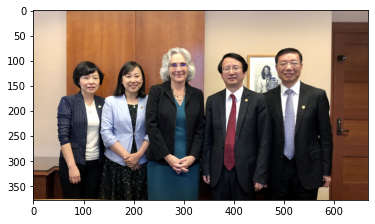

In [2]:
# Imread
def read_image(path=None, flags=cv2.IMREAD_COLOR):
    if path == None:
        raise Exception("No Path Input!")
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(img_rgb.shape)
    return img_rgb

img_wu = read_image("./images/wu.jpg")
plt.imshow(img_wu)

(66, 57, 3)


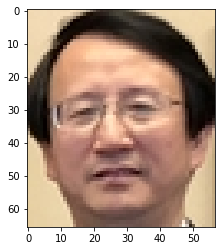

In [3]:
# Imread zhgg's face
img_wu_tem = read_image("./images/wu_tem.jpg")
plt.imshow(img_wu_tem)

In [4]:
# 模板匹配演示函数
width, height = img_wu_tem.shape[0], img_wu_tem.shape[1]

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
           cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

def show_wu_face(method, color=(255, 0, 0)):
    plt.figure(figsize=(12, 4))
    res = cv2.matchTemplate(img_wu, img_wu_tem, method)   # Match Template 得到 Res Mat
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap = 'gray')
    plt.subplot(1, 2, 2)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)    # 计算 Res Mat 最大最小值的位置
    print(min_val, max_val, min_loc, max_loc)
    top_left = min_loc if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED] else max_loc
    bottom_right = (top_left[0] + height, top_left[1] + width)
    # 绘制匹配结果
    img_wu_detect = cv2.rectangle(np.copy(img_wu), 
                                  top_left, bottom_right, color, 5)
    plt.imshow(img_wu_detect)

-21032008.0 47274936.0 (370, 116) (370, 86)


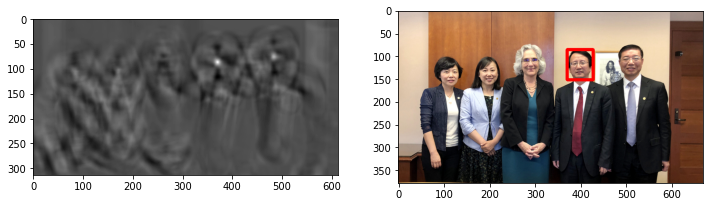

In [5]:
# cv2.TM_CCOEFF 匹配方法效果演示
show_wu_face(methods[0])

-0.4156877100467682 0.9993270635604858 (370, 116) (370, 86)


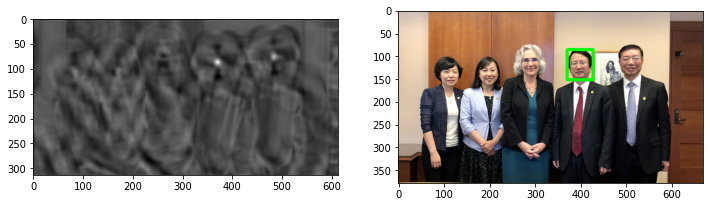

In [6]:
# cv2.TM_CCOEFF_NORMED 匹配方法效果演示
show_wu_face(methods[1], (0, 255, 0))

This is a bad algorithm
7438519.5 326176640.0 (470, 312) (537, 59)


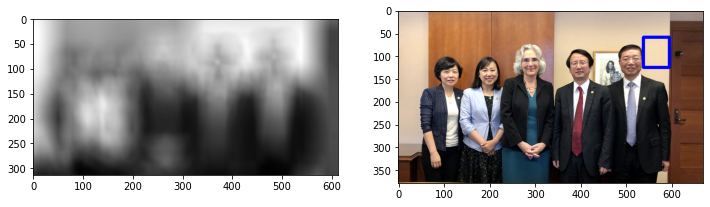

In [7]:
# cv2.TM_CCORR 匹配方法效果演示
print("This is a bad algorithm")
show_wu_face(methods[2], (0, 0, 255))

0.29923704266548157 0.9998716115951538 (88, 292) (370, 86)


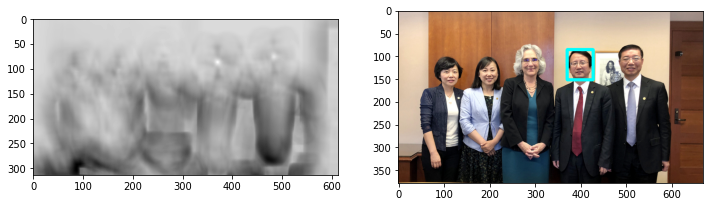

In [8]:
# cv2.TM_CCORR_NORMED 匹配方法效果演示
show_wu_face(methods[3], (0, 255, 255))

63684.0 233722720.0 (370, 86) (470, 312)


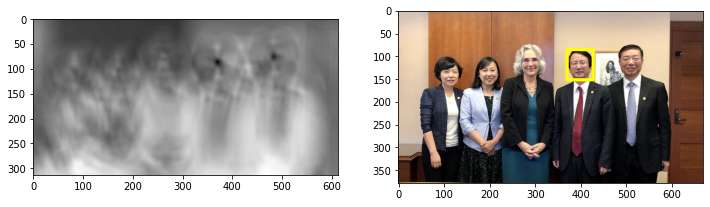

In [9]:
# cv2.TM_SQDIFF 匹配方法效果演示
show_wu_face(methods[4], (255, 255, 0))

0.0002567677292972803 1.0 (370, 86) (607, 22)


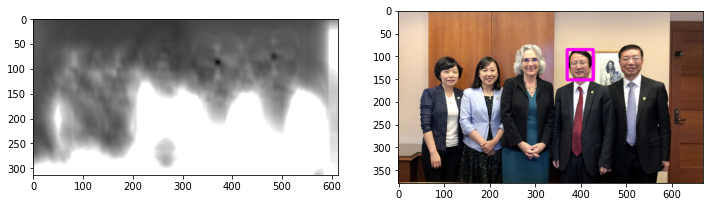

In [10]:
# cv2.TM_SQDIFF_NORMED 匹配方法效果演示
show_wu_face(methods[5], (255, 0, 255))

(900, 1600, 3)


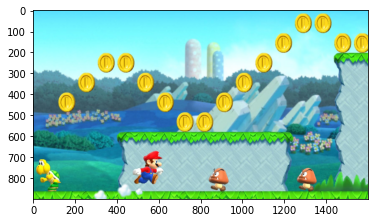

In [11]:
# Read Img
img_ma = read_image("./images/mario.jpg")
plt.imshow(img_ma)

(106, 91, 3)


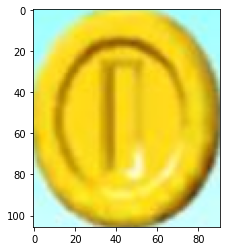

In [12]:
# Read Templ
img_tem = read_image("./images/coin.png")
plt.imshow(img_tem)

In [13]:
# 获取图片长宽
width, height = img_tem.shape[0], img_tem.shape[1]

# cv2.TM_CCOEFF_NORMED 方法进行模板匹配
res = cv2.matchTemplate(img_ma, img_tem, cv2.TM_CCOEFF_NORMED)   
threshold = 0.4
loc = np.where(res >= threshold)
img_ma_copy = np.copy(img_ma)
print(loc)
for pt in zip( * loc[::-1]):   # loc list xy交换，并zip
    cv2.rectangle(img_ma_copy, pt, (pt[0] + height, pt[1] + width), (255, 0, 0), 3)

def show_mario(res, img):
    plt.figure(figsize=(12, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(res, cmap = 'gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img)

(array([  0,   0,   0, ..., 488, 488, 488], dtype=int64), array([1238, 1239, 1240, ...,  774,  775,  776], dtype=int64))


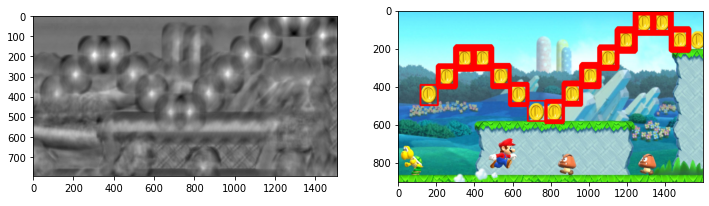

In [14]:
show_mario(res, img_ma_copy)

* 思考：为什么结果里面有的框比较粗，有的框比较细？

In [15]:
# 筛选同一个匹配区域的多个匹配结果，只保留一个
img_ma_copy = np.copy(img_ma)
last_width = 0
points = [pt for pt in zip( * loc[::-1])]
points = sorted(points, key=lambda x:x[0])
last_width = 0
for pt in points:
    if np.abs(pt[0] - last_width) < 50:
        continue
    last_width = pt[0]
    cv2.rectangle(img_ma_copy, pt, (pt[0] + height, pt[1] + width), (255, 0, 0), 3)

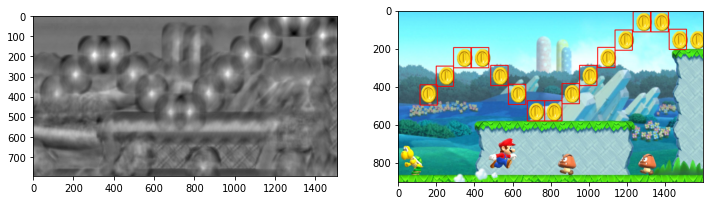

In [16]:
show_mario(res, img_ma_copy)

## 1.3 Solve by Image Gradient?

- All the above algorithms compare the similarity by calculating the pixel value
    - Too rigid, inflexible, sometimes naive
    - Not universal
    - Not robust
- Use image gradient to illustrate similarity
    - More robust and universal

### 1.3.1 SIFT 图像特征提取
* SIFT特征不只具有**尺度不变性**，**即使改变旋转角度，图像亮度或拍摄视角，仍然能够得到好的检测效果**
* 算法分成以下部分：
    * 建立尺度空间，寻找极值
    * 关键点定位：删除弱边缘--通过Hassian矩阵特征值实现，小于阈值自动舍弃。
    * 关键点方向指定
    * 关键点描述子
* SIFT特征提取可以解决的问题：
    * 目标的旋转、缩放、平移（RST）
    * 图像仿射/投影变换（视点viewpoint）
    * 光照影响（illumination）
    * 目标遮挡（occlusion）
    * 杂物场景（clutter）

### 1.3.2 SIFT in opencv
* `sift = cv2.xfeatures2d.SIFT_create()` 实例化sift
* `kq, dst = sift.detectAndCompute(gray, None)` 利用sift.detectAndCompute()检测关键点并计算
    * gray：进行关键点检测的图像，注意要是灰度图像
    * kp:关键点信息，包括位置，尺度，方向信息
    * des:关键点描述符，每个关键点对应128个梯度信息的特征向量
* `cv2.drawKeypoints(image, kq, outputimage, color, flags)`  将关键点检测结果绘制在图像上
    * image: 原始图像
    * kq: 关键点信息，将其绘制在图像上
    * outputimage: 输出图片，可以是原始图像
    * color:颜色设置，通过修改（b,g,r）的值，更改画笔的颜色，b=蓝色，g=绿色，r=红色
    * flags: 绘图功能的标识设置
        * cv2.DRAW_MATCHES_FLAGS_DEFAULT:创建输出图像矩阵，使用现存的输出图像匹配对和特征点，对每一个关键点，对每一个关键点只绘制中间点.
        * cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG:不创建输出图像矩阵，而是在输出图像上绘制匹配对
        * cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS:对每一个特征点绘制带大小和方向的关键点图形
        * cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS:单点的特征点不被绘制

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def read_image(path=None, flags=cv2.IMREAD_COLOR):
    if path == None:
        raise Exception("No Path Input!")
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    print(img_rgb.shape)
    return img_rgb

(533, 799, 3)


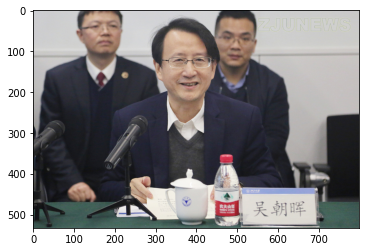

In [2]:
img_wu_2 = read_image("./images/wu_2.jpeg")
plt.imshow(img_wu_2)

(577, 868, 3)


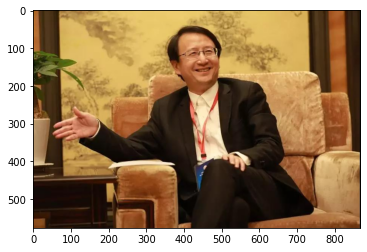

In [3]:
img_wu_3 = read_image("./images/wu_4.jpg")
plt.imshow(img_wu_3)

In [4]:
# we load the sift algorithm.
sift = cv2.xfeatures2d.SIFT_create()
# we find the keypoints and descriptors of the original image 
# and of the image to compare.
kp_1, desc_1 = sift.detectAndCompute(img_wu_2, None)
kp_2, desc_2 = sift.detectAndCompute(img_wu_3, None)
# we load `FlannBasedMatcher` which is 
# the method used to find the matches between the descriptors of the 2 images.
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
# we find the matches between the 2 images. 
# We’re storing the matches in the array ‘matches’
matches = flann.knnMatch(desc_1, desc_2, k=2)
print("Number of matches ->", len(matches))

Number of matches -> 886


In [5]:
# In this part we apply the ratio test to select only the good matches.
# The quality of a match is define by the distance. 
# The distance is a number, and the lower this number is, 
# the more similar the features are.
good_points = []
ratio = 0.88
for m, n in matches:
    if m.distance < ratio * n.distance:
        good_points.append(m)
print("Number of good_points ->", len(good_points))
img_wu_res = cv2.drawMatches(img_wu_2, kp_1, img_wu_3, kp_2, good_points, None)

Number of good_points -> 146


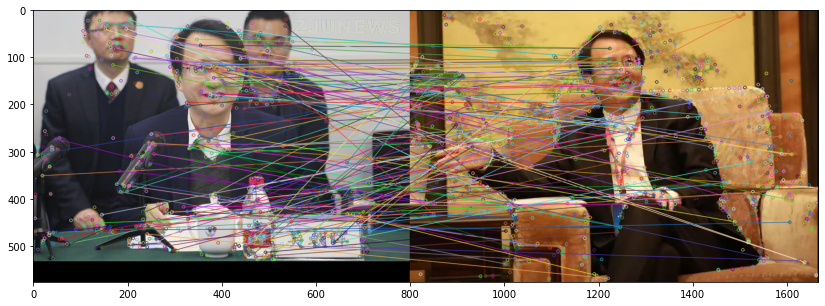

In [6]:
plt.figure(figsize=(16, 5))
plt.imshow(img_wu_res)

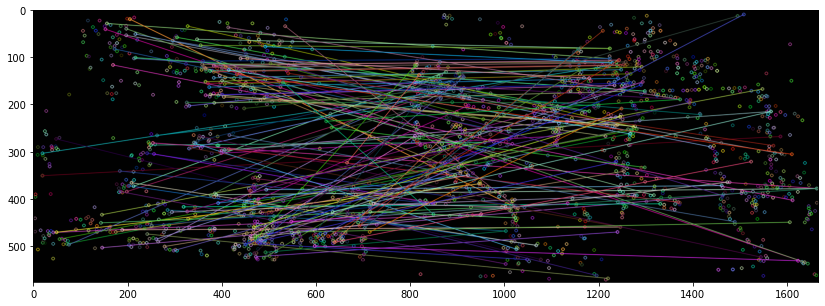

In [7]:
img_wu_res_ones = cv2.drawMatches(np.ones(img_wu_2.shape, dtype=np.uint8), kp_1, 
                                  np.ones(img_wu_3.shape, dtype=np.uint8), kp_2, 
                                  good_points, None)
plt.figure(figsize=(16, 5))
plt.imshow(img_wu_res_ones)

In [8]:
def draw_key_pts(good_points, img_2, img_3):
    list_kp_1 = [kp_1[mat.queryIdx].pt for mat in good_points]
    list_kp_2 = [kp_2[mat.trainIdx].pt for mat in good_points]
    for pt in list_kp_1:
        pt = (round(pt[0]), round(pt[1]))
        img_2 = cv2.circle(img_2, pt, 5, (255, 0, 0), -1)
    for pt in list_kp_2:
        pt = (round(pt[0]), round(pt[1]))
        img_3 = cv2.circle(img_3, pt, 5, (255, 0, 0), -1)
    return img_2, img_3

def show_img_den(img_2, img_3, group=None):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_2, group) if group is not None else plt.imshow(img_2)
    plt.subplot(1, 2, 2)
    plt.imshow(img_3, group) if group is not None else plt.imshow(img_3)

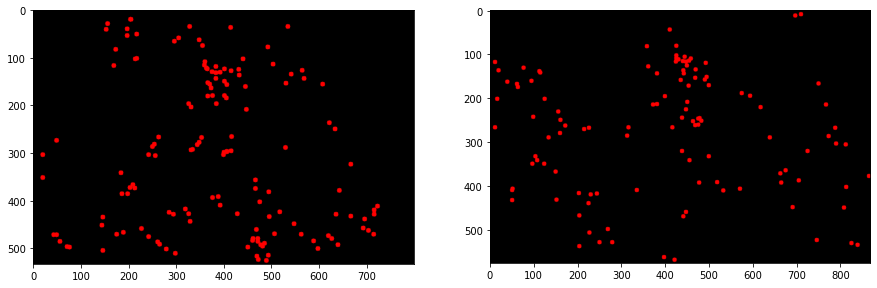

In [9]:
img_wu_den_2, img_wu_den_3 = draw_key_pts(good_points, 
                                          img_2=np.zeros(img_wu_2.shape, dtype=np.uint8), 
                                          img_3=np.zeros(img_wu_3.shape, dtype=np.uint8))
show_img_den(img_wu_den_2, img_wu_den_3)

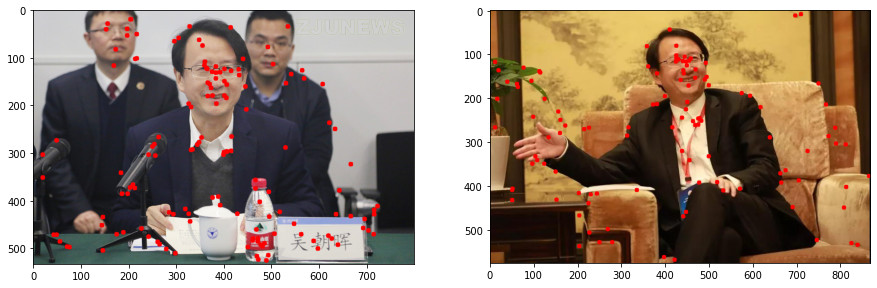

In [10]:
img_wu_den_2, img_wu_den_3 = draw_key_pts(good_points, 
                                          np.copy(img_wu_2), np.copy(img_wu_3))
show_img_den(img_wu_den_2, img_wu_den_3)

In [11]:
def filter_process(good_points, img_2_shape, img_3_shape, radius=2, 
                   kernel_size=75, lightness_rate=1.0):
    list_kp_1 = [kp_1[mat.queryIdx].pt for mat in good_points]
    list_kp_2 = [kp_2[mat.trainIdx].pt for mat in good_points]
    def filter_process_single(list_kp, img, radius=radius, 
                              kernel_size=kernel_size, lightness_rate=lightness_rate):
        for pt in list_kp:
            pt = (round(pt[0]), round(pt[1]))
            img = cv2.circle(img, pt, radius, (255, 255, 255), -1)
        img = cv2.boxFilter(img, -1, (kernel_size, kernel_size), normalize=True)
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                pixel_value = min(round((img[i][j] - 0) * lightness_rate), 255)
                img[i][j] = pixel_value
        return img
    img_2 = filter_process_single(list_kp_1, np.zeros(img_2_shape, dtype=np.uint8))
    img_3 = filter_process_single(list_kp_2, np.zeros(img_3_shape, dtype=np.uint8))
    return img_2, img_3

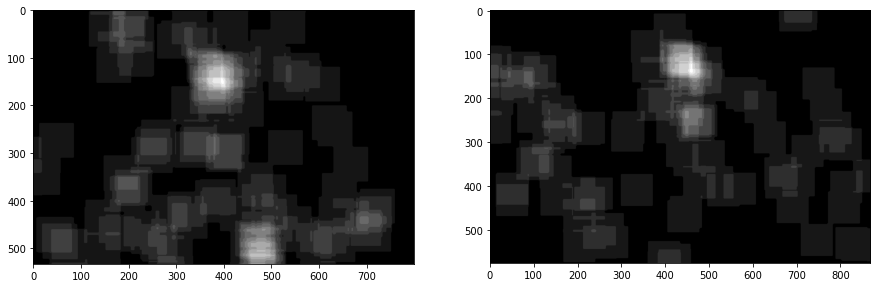

In [12]:
img_wu_den_2, img_wu_den_3 = filter_process(good_points, img_wu_2.shape[:2], 
                                            img_wu_3.shape[:2], lightness_rate=9.0)
show_img_den(img_wu_den_2, img_wu_den_3, group="gray")

In [13]:
def detect_process(img_wu_den, img_ori, radius_rate=1.0):
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_wu_den)  
    radius = max(round(max_val * radius_rate), 100)
    print(min_val, max_val, min_loc, max_loc, radius)
    img_wu_detect = cv2.circle(np.copy(img_ori), max_loc, radius, (255, 0, 0), 5)
    return img_wu_detect

0.0 108.0 (0, 0) (395, 143) 108
0.0 99.0 (0, 0) (457, 123) 100


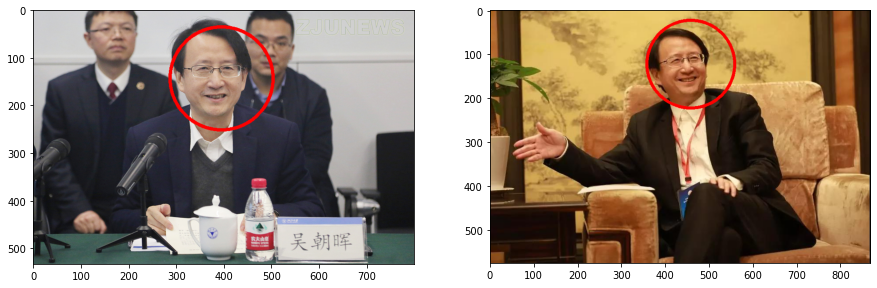

In [14]:
img_wu_detect_2 = detect_process(img_wu_den_2, np.copy(img_wu_2)) 
img_wu_detect_3 = detect_process(img_wu_den_3, np.copy(img_wu_3))
show_img_den(img_wu_detect_2, img_wu_detect_3)

# `cvzone` and `mediapipe`

- [mediapipe link](https://google.github.io/mediapipe/)
- [cvzone link](https://www.computervision.zone/)
- [mediapipe github](https://github.com/cvzone/cvzone)
- [cvzone github](https://github.com/google/mediapipe)


# The End

2023.4